In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [20]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Grab the content 

In [21]:
import urllib.request
response = urllib.request.urlopen('http://php.net/')
html = response.read()
print (html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="http://php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="http://php.net/index.php">\n <link rel="shorturl" href="http://php.net/index">\n <link rel="alternate" href="http://php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen">\n<link rel="styles

As we can see content have so many HTML tags. Lets remove them by using beautifulSoup.

In [22]:
from bs4 import BeautifulSoup
import urllib.request 
response = urllib.request.urlopen('http://php.net/') 
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
print (text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific E

# convert that text into tokens

In [23]:
from bs4 import BeautifulSoup 
import urllib.request 
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html5lib") 
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
print (tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesErrorsExceptionsGeneratorsReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUsing', 'Register', 'GlobalsUser', 'Submitted', 'DataMagic', 'QuotesHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsSafe', 'ModeComman

# Count Word Frequency

In [24]:
from bs4 import BeautifulSoup
import urllib.request
import nltk 
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html5lib") 
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
freq = nltk.FreqDist(tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
and:80
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
as:2
CGI:1
binaryInstalled:1
an:2
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
with:4
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffe

# Remove stop words

In [25]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
clean_tokens = tokens[:] 
sr = stopwords.words('english')
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

In [27]:
from bs4 import BeautifulSoup 
import urllib.request 
import nltk 
from nltk.corpus import stopwords 
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html5lib") 
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
clean_tokens = tokens[:] 
sr = stopwords.words('english') 
for token in tokens: 
    if token in stopwords.words('english'): 
        clean_tokens.remove(token) 
freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

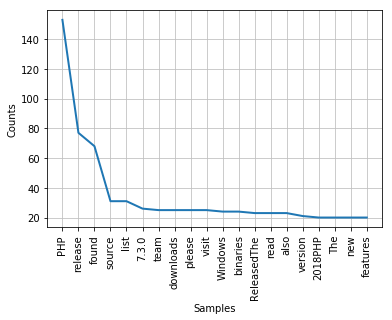

In [28]:
freq.plot(20,cumulative=False)


# Tokenize Text Using NLTK

In [29]:
from nltk.tokenize import sent_tokenize 
mytext = "Hello Adam, how are you? I hope everything is going well. Today is a good day, see you dude." 
print(sent_tokenize(mytext))

['Hello Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


In [30]:
from nltk.tokenize import sent_tokenize 
mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude." 
print(sent_tokenize(mytext))

['Hello Mr. Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


In [31]:
from nltk.tokenize import word_tokenize
mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
print(word_tokenize(mytext))

['Hello', 'Mr.', 'Adam', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'Today', 'is', 'a', 'good', 'day', ',', 'see', 'you', 'dude', '.']


# Tokenize Non-English Languages Text

In [32]:
from nltk.tokenize import sent_tokenize
mytext = "Bonjour M. Adam, comment allez-vous? J'espère que tout va bien. Aujourd'hui est un bon jour."
print(sent_tokenize(mytext,"french"))

['Bonjour M. Adam, comment allez-vous?', "J'espère que tout va bien.", "Aujourd'hui est un bon jour."]


# Get Synonyms From WordNet

In [33]:
from nltk.corpus import wordnet
syn = wordnet.synsets("pain")
print(syn[0].definition())
print(syn[0].examples())

a symptom of some physical hurt or disorder
['the patient developed severe pain and distension']


In [34]:
from nltk.corpus import wordnet
syn = wordnet.synsets("NLP")
print(syn[0].definition())
syn = wordnet.synsets("Python")
print(syn[0].definition())

the branch of information science that deals with natural language information
large Old World boas


In [35]:
from nltk.corpus import wordnet 
synonyms = []
for syn in wordnet.synsets('Computer'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
print(synonyms)

['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system', 'calculator', 'reckoner', 'figurer', 'estimator', 'computer']


# Get Antonyms From WordNet

In [36]:
from nltk.corpus import wordnet
antonyms = []
for syn in wordnet.synsets("small"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
print(antonyms)

['large', 'big', 'big']


# Word Stemming

In [37]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer() 
print(stemmer.stem('working'))

work


In [38]:
from nltk.stem import SnowballStemmer
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [39]:
from nltk.stem import SnowballStemmer
french_stemmer = SnowballStemmer('french')
print(french_stemmer.stem("French word"))

french word


# Lemmatizing Words

In [40]:
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer() 
print(stemmer.stem('increases'))

increas


In [41]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('increases'))

increase


In [42]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('playing', pos="v"))

play


In [43]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
print(lemmatizer.lemmatize('playing', pos="v")) 
print(lemmatizer.lemmatize('playing', pos="n")) 
print(lemmatizer.lemmatize('playing', pos="a")) 
print(lemmatizer.lemmatize('playing', pos="r"))

play
playing
playing
playing


# Stemming and Lemmatization Difference

In [44]:
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer() 
print(stemmer.stem('stones')) 
print(stemmer.stem('speaking')) 
print(stemmer.stem('bedroom')) 
print(stemmer.stem('jokes')) 
print(stemmer.stem('lisa')) 
print(stemmer.stem('purple')) 
print('----------------------') 
print(lemmatizer.lemmatize('stones')) 
print(lemmatizer.lemmatize('speaking'))
print(lemmatizer.lemmatize('bedroom'))
print(lemmatizer.lemmatize('jokes'))
print(lemmatizer.lemmatize('lisa'))
print(lemmatizer.lemmatize('purple'))

stone
speak
bedroom
joke
lisa
purpl
----------------------
stone
speaking
bedroom
joke
lisa
purple


urllib module will help us to crawl the webpage

In [45]:
import urllib.request
response =  urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>SpaceX - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":875024470,"wgRevisionId":875024470,"wgArticleId":832774,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: BOT: original-url status unknown","CS1 maint: Unfit url","Pages containing links to subscription-only content","CS1 French-language sources (fr)","Articles with short description","Use American English from November 2015","All Wikipedia articles written in American English","Use mdy dates from November 2015","Coordinates not o

In [46]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
print(text)

SpaceX - Wikipediadocument.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":875024470,"wgRevisionId":875024470,"wgArticleId":832774,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: BOT: original-url status unknown","CS1 maint: Unfit url","Pages containing links to subscription-only content","CS1 French-language sources (fr)","Articles with short description","Use American English from November 2015","All Wikipedia articles written in American English","Use mdy dates from November 2015","Coordinates not on Wikidata","Articles containing potentially dated statements from April 2017","All articles containing potentially dated statements","Articles co

In [47]:
tokens = [t for t in text.split()]
print(tokens)

['SpaceX', '-', 'Wikipediadocument.documentElement.className', '=', 'document.documentElement.className.replace(', '/(^|\\s)client-nojs(\\s|$)/,', '"$1client-js$2"', ');(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":875024470,"wgRevisionId":875024470,"wgArticleId":832774,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1', 'maint:', 'BOT:', 'original-url', 'status', 'unknown","CS1', 'maint:', 'Unfit', 'url","Pages', 'containing', 'links', 'to', 'subscription-only', 'content","CS1', 'French-language', 'sources', '(fr)","Articles', 'with', 'short', 'description","Use', 'American', 'English', 'from', 'November', '2015","All', 'Wikipedia', 'articles', 'written', 'in', 'American', 'English","Use', 'mdy', 'dates', 'from', 'November', '2015","Coordinates', 'not', 'on', 'Wikid

SpaceX:144
-:5
Wikipediadocument.documentElement.className:1
=:1
document.documentElement.className.replace(:1
/(^|\s)client-nojs(\s|$)/,:1
"$1client-js$2":1
);(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":875024470,"wgRevisionId":875024470,"wgArticleId":832774,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1:1
maint::15
BOT::12
original-url:12
status:12
unknown","CS1:1
Unfit:3
url","Pages:1
containing:16
links:3
subscription-only:2
content","CS1:1
French-language:2
sources:3
(fr)","Articles:1
short:4
description","Use:1
American:7
English:2
November:13
2015","All:1
Wikipedia:4
articles:24
written:2
English","Use:1
mdy:2
dates:2
2015","Coordinates:1
Wikidata","Articles:1
potentially:14
dated:14
statements:14
April:16
2017","All:1
statements","Articles:2
March:19
201

landings,:2
indicated:4
offering:1
customers:1
discount:1
choose:1
reused:3
stage.[125]On:1
"flight-proven":1
theSES-10:1
payload-carrying:1
space.[126][63]The:1
recovered:1
Youin:1
class:1
rocket.:1
called:1
"incredible:1
milestone:1
history:2
space."[127][128]Interplanetary:1
BFR[edit]Artist's:1
impression:1
Spaceshipon:1
theJovian:1
moonEuropa.Main:1
infrastructureSpaceX:1
super-heavy:1
lift:2
theBFR.:1
BFR:6
replace:1
company's:2
existing:1
2020s,:1
ground:1
infrastructure:1
rapid:1
relaunch,:1
zero-gravity:1
inlow:1
orbit(LEO).SpaceX:1
ITS:1
solely:1
aimed:1
transit:1
focus:2
support:2
capabilities::1
Earth-orbit,:1
lunar-orbit,:1
even:1
intercontinental:1
passenger:2
Earth.[129]The:1
rocket.[42]Private:1
passengerYusaku:1
Maezawahas:1
signed:3
rocket.[130][131][132]Musk's:1
long:1
term:1
vision:1
resources:2
suitable:1
He:1
expressed:1
someday:1
traveling:1
planet,:1
stating:1
"I'd:1
die:2
impact."[133]A:1
base:1
people:5
arriving:1
2025:1
2024.[134][135]According:1
Steve:4
belie

RetrievedJuly:2
15,2015.^abc"Falcon:1
Overview".:2
2011.:6
2007.:1
1,2017.^ab"Private:1
capsule's:1
voyage:1
ends:1
splash".:1
BBC:2
1,2017.^Miriam:1
Kramer:1
2014)."SpaceX:5
Unveils:1
V2:1
Spaceship,:1
Manned:3
Taxi:2
Astronauts:2
Meet:1
V2::1
Astronaut:1
Trips".:1
Space.com.:4
1,2017.^Shotwell,:1
2015)."STATEMENT:1
GWYNNE:1
SHOTWELL:1
CHIEF:1
OPERATING:1
OFFICER:1
(SPACEX)"(PDF).^https://www.inverse.com/article/35774-elon-musk-names-spacex^"SpaceX:1
Thruster:1
Performs:1
Long-Duration:1
Firing:1
Restart"(Press:1
1,2017.^"Falcon:2
Vehicle:1
Payload:1
User's:1
Guide,:1
2009"(PDF).:1
(link)^"SpaceX:2
performs:1
SpaceNews.com".SpaceNews.com.:2
2016-09-26.:1
Retrieved2017-04-28.^"Senate:1
Hearing:1
108-1001,":1
THE:1
SHUTTLE:1
AND:2
FUTRE:1
LAUNCH:1
VEHICLES,:1
2004,https://www.gpo.gov/fdsys/pkg/CHRG-108shrg20624/html/CHRG-108shrg20624.htm^"SpaceX:1
Successfully:1
Launches:1
Orbit"(Press:1
announces:1
heavy:1
vehicle"(Press:1
2005.:2
(link)^abcCanadian:1
Press:3
2012)."Private:1
blasts:1


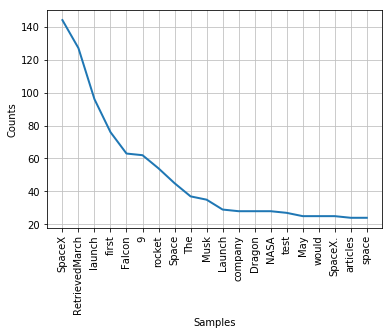

In [48]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)